Parte 1 - Leitura do dataset e configurações iniciais

Importa as classes necessárias e monta o drive para acessar o arquivo de dados.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lê o arquivo com os dados e apresenta o dataframe

In [3]:
colunas = ['preco', 'manutencao', 'portas', 'pessoas', 'bagageiro', 'seguranca', 'resultado']
dados = pd.read_csv('car_evaluation.csv', names=colunas)
dados

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


Atributos e valores:

preco - Preço de venda:
low - baixo;
med - médio;
high - alto;
vhigh - muito alto.
manutencao - Custo de manutenção:
low - baixo;
med - médio;
high - alto;
vhigh - muito alto.
portas - Quantidade de portas:
2 - duas;
3 - três;
4 - quatro;
5more - cinco ou mais.
pessoas - Quantidade de pessoas:
2 - duas;
4 - quatro;
more - mais.
bagageiro - Tamanho do bagageiro:
small - pequeno;
med - médio;
big - grande;
segurança - Nível de segurança:
low - baixo;
med - médio;
high - alto.
resultado' - Resultado sobre a análise do carro:
unacc - inaceitável;
acc - aceitável;
good - bom;
vgood - muito bom.

Transforma os valores qualitativos em codificações numéricas.

In [4]:
from sklearn.preprocessing import LabelEncoder

dados2 = dados.copy()
le = LabelEncoder()
dados2['preco']=le.fit_transform(dados['preco'])
dados2['manutencao']=le.fit_transform(dados['manutencao'])
dados2['portas']=le.fit_transform(dados['portas'])
dados2['pessoas']=le.fit_transform(dados['pessoas'])
dados2['bagageiro']=le.fit_transform(dados['bagageiro'])
dados2['seguranca']=le.fit_transform(dados['seguranca'])
dados2['resultado']=le.fit_transform(dados['resultado'])
dados2.head(10)

,preco,manutencao,portas,pessoas,bagageiro,seguranca,resultado
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2
5,3,3,0,0,1,0,2
6,3,3,0,0,0,1,2
7,3,3,0,0,0,2,2
8,3,3,0,0,0,0,2
9,3,3,0,1,2,1,2


Cria a matriz X com todos atributos, exceto o resultado;
Cria o vetor y com o atributo resultado;
Divide os dados em 33% para teste e 67% para treinamento.

In [5]:
from sklearn.model_selection import train_test_split

X = dados2.drop(["resultado"] ,axis="columns")
y = dados2['resultado']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=13, shuffle=True)

Parte 2 - Exemplo - Naive Bayes

Cria e treina um modelo de Naive Bayes Categórico. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       0.71      0.74      0.72       258
           1       0.50      0.21      0.29        48
           2       0.93      0.97      0.95       807
           3       0.96      0.50      0.66        44

    accuracy                           0.87      1157
   macro avg       0.77      0.61      0.66      1157
weighted avg       0.86      0.87      0.86      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.71      0.75      0.73       126
           1       1.00      0.10      0.17        21
           2       0.93      0.98      0.95       403
           3       1.00      0.48      0.65        21

    accuracy                           0.88       571
   macro avg       0.91      0.58      0.63       571
weighted avg       0.89      0.88      0.86       571



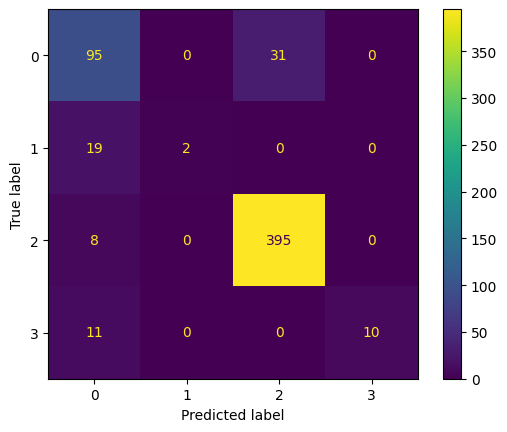

In [6]:
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = CategoricalNB()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Cria e treina um modelo de Naive Bayes Gaussiano. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Relatório do conjunto de treinamento: 
              precision    recall  f1-score   support

           0       0.56      0.07      0.13       258
           1       0.67      0.04      0.08        48
           2       0.84      0.82      0.83       807
           3       0.13      1.00      0.23        44

    accuracy                           0.63      1157
   macro avg       0.55      0.48      0.32      1157
weighted avg       0.75      0.63      0.62      1157

Relatório do conjunto de teste: 
              precision    recall  f1-score   support

           0       0.52      0.10      0.17       126
           1       0.00      0.00      0.00        21
           2       0.87      0.80      0.83       403
           3       0.12      1.00      0.22        21

    accuracy                           0.63       571
   macro avg       0.38      0.48      0.31       571
weighted avg       0.73      0.63      0.63       571



c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\roberto\Documents\faculdade Patriki\patriki\Patriki\venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

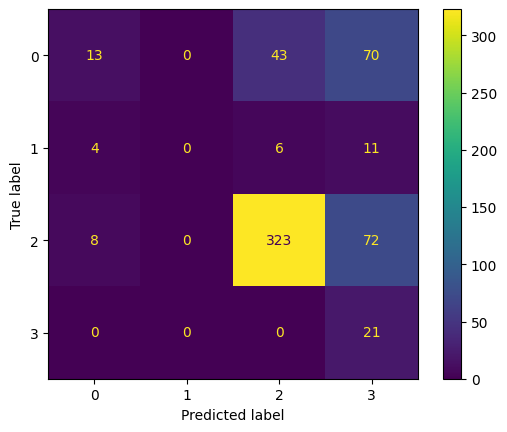

In [7]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

modelo = GaussianNB()
modelo.fit(X_train, y_train)

y_pred_train = modelo.predict(X_train)
print("Relatório do conjunto de treinamento: ")
relatorio_train = classification_report(y_train, y_pred_train)
print(relatorio_train)

y_pred = modelo.predict(X_test)
print("Relatório do conjunto de teste: ")
relatorio_teste = classification_report(y_test, y_pred)
print(relatorio_teste)

matriz = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=matriz)
disp.plot()

Parte 3 - Atividade

Cria e treina um modelo de classificação linear rígido. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Cria e treina um modelo de classificação linear estocástica. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Cria e treina uma árvore de decisão com limite máximo de cinco níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Apresenta a árvore de decisão gerada.

Cria e treina uma árvore de decisão com limite máximo de dez níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.

Cria e treina uma random forest com limite máximo de dez níveis. Em seguida apresenta relatório de avaliação para os dados de treinamento e de teste e a matriz de confusão dos dados de teste.